In [1]:
import numpy as np
import pdb
from astropy.io import fits
import matplotlib.pylab as plt
import re
import os
from astropy.io import fits
from datetime import datetime
from scipy.signal import medfilt
import matplotlib.dates as mdates
%load_ext autoreload
%autoreload 2

In [2]:
pwd()

'/global/u2/c/crockosi'

In [3]:
dataroot='/global/cfs/cdirs/desi/spectro/data/'

In [4]:
cd 'guiding'

/global/u2/c/crockosi/guiding


In [5]:
from readguide import *

In [55]:
def cstatstovecs(centroidstatsdict):
    xmean=[]
    ymean=[]
    xrms=[]
    yrms=[]
    xstd=[]
    ystd=[]
    rotmean=[]
    rotstd=[]
    rotrange=[]
    rotmax=[]
    rotdelta=[]
    seeing=[]
    ramean=[]
    rarms=[]
    rastd=[]
    decmean=[]
    decrms=[]
    decstd=[]
    nstars=[]
    nstarsrms=[]
    nstarsstd=[]
    airmass=[]
    skyra=[]
    mountaz=[]
    mountel=[]
    mountha=[]
    mountdec=[]
    pmirtemp=[]
    tairtemp=[]
    windspeed=[]
    winddir=[]
    dateobs=[]
    seqidvec=list(centroidstatsdict.keys())
    for i in range(len(seqidvec)):
        onedict=centroidstatsdict[str(int(seqidvec[i]))]
        cx = onedict['combined_x']['combined_x']
        cy = onedict['combined_y']['combined_y']
        ra = onedict['tcs_correction_ra']['tcs_correction_ra']
        dec = onedict['tcs_correction_dec']['tcs_correction_dec']
        xmean.append(cx['mean'])
        xrms.append(cx['rms'])
        xstd.append(cx['std'])
        try:
            rotation=onedict['rotation']['rotation']
            rotmean.append(rotation['mean'])
            rotstd.append(rotation['std'])
            rotrange.append(rotation['range'])
            rotmax.append(rotation['max'])
            rotdelta.append(rotation['delta'])
        except Exception as e:
            rotmean.append(-999)
            rotstd.append(-999)
            rotrange.append(-999)
            rotmax.append(-999)
            rotdelta.append(-999)
            print(e)
        ymean.append(cy['mean'])
        yrms.append(cy['rms'])
        ystd.append(cy['std'])
        ramean.append(ra['mean'])
        rarms.append(ra['rms'])
        rastd.append(ra['std'])
        decmean.append(dec['mean'])
        decrms.append(dec['rms'])
        decstd.append(dec['std'])
        nsdict=onedict['nstars']['nstars']
        nstars.append(nsdict['mean'])
        nstarsrms.append(nsdict['rms'])
        nstarsstd.append(nsdict['std'])
        airmass.append(onedict['airmass']['airmass'])
        skyra.append(onedict['skyra']['skyra'])
        mountha.append(onedict['mountha']['mountha'])
        mountdec.append(onedict['mountdec']['mountdec'])
        mountaz.append(onedict['mountaz']['mountaz'])
        mountel.append(onedict['mountel']['mountel'])
        pmirtemp.append(onedict['pmirtemp']['pmirtemp'])
        tairtemp.append(onedict['tairtemp']['tairtemp'])
        windspeed.append(onedict['windspeed']['windspeed'])
        winddir.append(onedict['winddir']['winddir'])
        dateobs.append(onedict['dateobs']['dateobs'])
        seeval = onedict['seeing']['seeing']
        if seeval is not None:
            seeing.append(seeval)
        else:
            seeing.append(0)
    xmean=np.asarray(xmean)
    xrms=np.asarray(xrms)
    xstd=np.asarray(xstd)
    ymean=np.asarray(ymean)
    yrms=np.asarray(yrms)
    ystd=np.asarray(ystd)
    rotmean=np.asarray(rotmean)
    rotstd=np.asarray(rotstd)
    rotrange=np.asarray(rotrange)
    rotmax=np.asarray(rotmax)
    rotdelta=np.asarray(rotdelta)
    seeing=np.asarray(seeing)
    ramean=np.asarray(ramean)
    rarms=np.asarray(rarms)
    rastd=np.asarray(rastd)
    decmean=np.asarray(decmean)
    decrms=np.asarray(decrms)
    decstd=np.asarray(decstd)
    nstars=np.asarray(nstars)
    nstarsrms=np.asarray(nstarsrms)
    nstarsstd=np.asarray(nstarsstd)
    airmass=np.asarray(airmass)
    skyra=np.asarray(skyra)
    mountha=np.asarray(mountha)
    mountdec=np.asarray(mountdec)
    mountaz=np.asarray(mountaz)
    mountel=np.asarray(mountel)
    pmirtemp=np.asarray(pmirtemp)
    tairtemp=np.asarray(tairtemp)
    windspeed=np.asarray(windspeed)
    winddir=np.asarray(winddir)
    dateobs=np.asarray(dateobs)
    outdict = {}
    outdict['seqid'] = (np.asarray(seqidvec)).astype('int')
    outdict['xmean'] = xmean
    outdict['xrms'] = xrms
    outdict['xstd'] = xstd
    outdict['ymean'] = ymean
    outdict['yrms'] = yrms
    outdict['ystd'] = ystd
    outdict['rotmean']=rotmean
    outdict['rotstd']=rotstd
    outdict['rotrange']=rotrange
    outdict['rotmax']=rotmax
    outdict['rotdelta']=rotdelta
    outdict['seeing'] = seeing
    outdict['ramean'] = ramean
    outdict['rarms'] = rarms
    outdict['rastd'] = rastd
    outdict['decmean'] = decmean
    outdict['decrms'] = decrms
    outdict['decstd'] = decstd
    outdict['nstars'] = nstars
    outdict['nstarsrms'] = nstarsrms
    outdict['nstarsstd'] = nstarsstd
    outdict['airmass'] = airmass
    outdict['skyra'] = skyra
    outdict['mountha'] = mountha
    outdict['mountdec'] = mountdec
    outdict['mountaz'] = mountaz
    outdict['mountel'] = mountel
    outdict['pmirtemp'] = pmirtemp
    outdict['tairtemp'] = tairtemp
    outdict['windspeed'] = windspeed
    outdict['winddir'] = winddir
    outdict['dateobs'] = dateobs
    return outdict


In [56]:
def getcentroidsbydate(obsdateminstr,obsdatemaxstr,dataroot='/global/cfs/cdirs/desi/spectro/data/',getcoords=True):
    outdict = {}
    obsdirlistall=os.listdir(dataroot)
    # get obsdirs that are in range of obsdates
    obsdirlist=[]
    obsdatemin=datetime.strptime(obsdateminstr,'%Y%m%d')
    obsdatemax=datetime.strptime(obsdatemaxstr,'%Y%m%d')
    for i in range(len(obsdirlistall)):
        obsstr = obsdirlistall[i]
        if re.search('[0-9]+',obsstr):
            obsdate=datetime.strptime(obsstr,'%Y%m%d')
            if (obsdate>=obsdatemin) & (obsdate<=obsdatemax):
                obsdirlist.append(obsstr)
    # now for each obsdir, get list of subdirs named by seqid and then find and read the centroid files
    for i in range(len(obsdirlist)):
        # in each obsdir is a list of directories by seqid
        obsdir=obsdirlist[i]
        fullobsdir=dataroot+'/'+obsdir+'/'
        seqdirlist=os.listdir(fullobsdir)
        # search each seqid directory for centroids files
        for seqid in seqdirlist:
            iseqdir=fullobsdir+'/'+seqid+'/'
            flist=os.listdir(iseqdir)
            for ifile in flist:
                if re.search('^centroids-',ifile) != None:
                    try:
                        cdict = getcentroids(iseqdir,seqid)
                    except Exception as e:
                        print(seqid,e)
                    if cdict != None:
                        outdict[str(int(seqid))]=cdict
                    # now get coord info from guide header
                    if (getcoords==True) & (cdict != None):
                        gfile = iseqdir+'/guide-'+seqid+'.fits.fz'
                        try:
                            ghdr=fits.getheader(gfile)
                            cdict['airmass']=ghdr['AIRMASS']
                            cdict['skyra']=ghdr['SKYRA']
                            cdict['mountaz']=ghdr['MOUNTAZ']
                            cdict['mountel']=ghdr['MOUNTEL']
                            cdict['mountha']=ghdr['MOUNTHA']
                            cdict['mountdec']=ghdr['MOUNTDEC']
                            cdict['pmirtemp']=ghdr['PMIRTEMP']
                            cdict['tairtemp']=ghdr['TAIRTEMP']
                            cdict['windspeed']=ghdr['WINDSPD']
                            cdict['winddir']=ghdr['WINDDIR']
                            cdict['dateobs']=datetime.strptime(ghdr['DATE-OBS'],'%Y-%m-%dT%H:%M:%S.%f')
                            outdict[str(int(seqid))]=cdict
                        except Exception as e:
                            print(seqid,e)
                            cdict['airmass']=-999
                            cdict['skyra']=-999
                            cdict['mountaz']=-999
                            cdict['mountel']=-999
                            cdict['mountha']=-999
                            cdict['mountdec']=-999
                            cdict['pmirtemp']=-999
                            cdict['tairtemp']=-999
                            cdict['windspeed']=-999
                            cdict['winddir']=-999
                            cdict['dateobs']=-999
                            outdict[str(int(seqid))]=cdict
    return outdict

In [8]:
# Behzad's new MKP in spring of 2022
# first pointing jump 20221017
# obvious guiding problems 20221031
# power cycle of motion control that seems to have fixed/improved things 20221112
# new simplified pointing model installed 20230107

In [54]:
prevgdict=getcentroidsbydate('20220901','20221030')
badgdict=getcentroidsbydate('20221031','20221112')
newgdict=getcentroidsbydate('20221113','20230108')

00150069 "Keyword 'AIRMASS' not found."
00150177 [Errno 2] No such file or directory: '/global/cfs/cdirs/desi/spectro/data//20221025//00150177//guide-00150177.fits.fz'
00150201 "Keyword 'AIRMASS' not found."
00150199 [Errno 2] No such file or directory: '/global/cfs/cdirs/desi/spectro/data//20221025//00150199//guide-00150199.fits.fz'
00150462 "Keyword 'AIRMASS' not found."
00142463 "Keyword 'AIRMASS' not found."
00142464 "Keyword 'AIRMASS' not found."
00151831 "Keyword 'AIRMASS' not found."
00151971 "Keyword 'AIRMASS' not found."
00151973 "Keyword 'AIRMASS' not found."
00157267 [Errno 2] No such file or directory: '/global/cfs/cdirs/desi/spectro/data//20221210//00157267//guide-00157267.fits.fz'
00157277 [Errno 2] No such file or directory: '/global/cfs/cdirs/desi/spectro/data//20221210//00157277//guide-00157277.fits.fz'
00159592 [Errno 2] No such file or directory: '/global/cfs/cdirs/desi/spectro/data//20221222//00159592//guide-00159592.fits.fz'
00156881 [Errno 2] No such file or direc

In [153]:
newgdict['153306'].keys()

dict_keys(['combined_x', 'combined_y', 'seeing', 'nstars', 'rotation', 'GUIDE0_0', 'GUIDE2_0', 'GUIDE2_1', 'GUIDE3_0', 'GUIDE3_1', 'GUIDE5_0', 'GUIDE5_1', 'GUIDE7_0', 'GUIDE8_0', 'expid', 'pixel_scale', 'pixel_scale_x', 'pixel_scale_y', 'tcs_correction_ra', 'tcs_correction_dec', 'guiding', 'send_guide_corrections', 'duration', 'frames', 'meanx', 'meany', 'meanx2', 'meany2', 'meanxy', 'maxx', 'maxy', 'airmass', 'skyra', 'mountaz', 'mountel', 'mountha', 'mountdec', 'pmirtemp', 'tairtemp', 'windspeed', 'winddir', 'dateobs'])

In [57]:
def trimcentroids_nframes(centroiddict, minframes):
    outdict = {}
    seqidlist=list(centroiddict.keys())
    for i in range(len(seqidlist)):
        icdict = centroiddict[seqidlist[i]]
        nframes = icdict['frames']
        if nframes >= minframes:
            outdict[seqidlist[i]]=icdict
    return outdict

In [58]:
cprevgdict=trimcentroids_nframes(prevgdict,100)
cbadgdict=trimcentroids_nframes(badgdict,100)
cnewgdict=trimcentroids_nframes(newgdict,100)

In [61]:
prevtrimstats=centroidstats(cprevgdict,cprevgdict.keys())
badtrimstats=centroidstats(cbadgdict,cbadgdict.keys())
newtrimstats=centroidstats(cnewgdict,cnewgdict.keys())

In [62]:
cprevvdict = cstatstovecs(prevtrimstats)
cbadvdict = cstatstovecs(badtrimstats)
cnewvdict = cstatstovecs(newtrimstats)

'rotation'


In [63]:
def trimcstatsvecs_nstarsstd(centroidvecsdict,nstarsstdmax):
    outdict = {}
    nstarsrms=centroidvecsdict['nstarsstd']
    itake,=np.where(nstarsrms <= nstarsstdmax)
    for ikey in list(centroidvecsdict.keys()):
        outdict[ikey] = centroidvecsdict[ikey][itake]
    return outdict

In [64]:
cprevvecd=trimcstatsvecs_nstarsstd(cprevvdict,1)
cbadvecd=trimcstatsvecs_nstarsstd(cbadvdict,1)
cnewvecd=trimcstatsvecs_nstarsstd(cnewvdict,1)

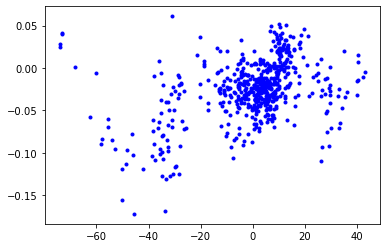

In [68]:
plt.plot(cprevvecd['mountha'],cprevvecd['ramean'],'bo',ms=3)


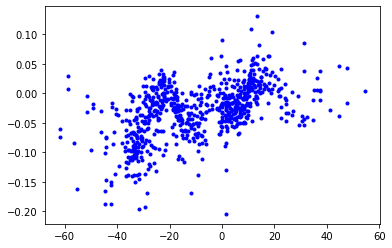

In [69]:
plt.plot(cnewvecd['mountha'],cnewvecd['ramean'],'bo',ms=3)

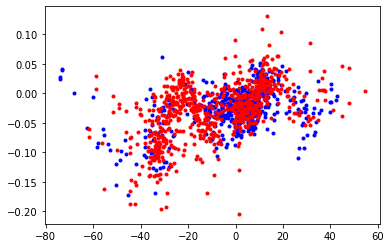

In [70]:
plt.plot(cprevvecd['mountha'],cprevvecd['ramean'],'bo',ms=3)

plt.plot(cnewvecd['mountha'],cnewvecd['ramean'],'ro',ms=3)

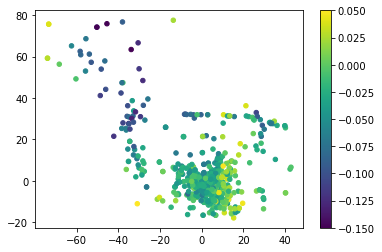

In [71]:
plt.scatter(cprevvecd['mountha'],cprevvecd['mountdec'],c=cprevvecd['ramean'], s=20,vmin=-0.15, vmax=0.05)
plt.colorbar()

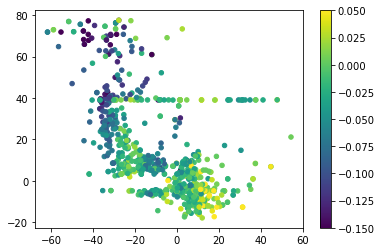

In [72]:
plt.scatter(cnewvecd['mountha'],cnewvecd['mountdec'],c=cnewvecd['ramean'], s=20,vmin=-0.15,vmax=0.05)
plt.colorbar()

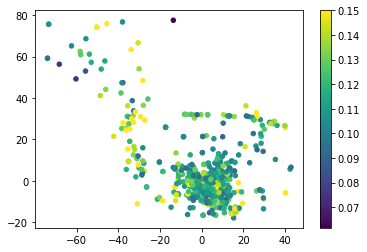

In [73]:
plt.scatter(cprevvecd['mountha'],cprevvecd['mountdec'],c=cprevvecd['rarms'], s=20,vmax=0.15)
plt.colorbar()

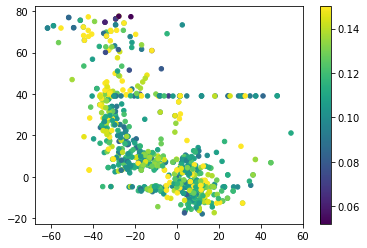

In [74]:
plt.scatter(cnewvecd['mountha'],cnewvecd['mountdec'],c=cnewvecd['rarms'], s=20,vmax=0.15)
plt.colorbar()

Text(0.5, 1.0, 'max-min rotation correction per exposure, hexapod arcsec')

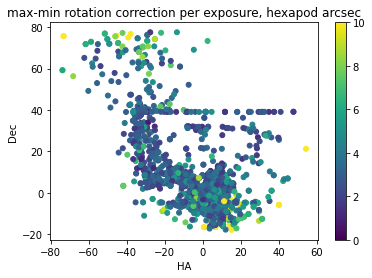

In [75]:
plt.scatter(cprevvecd['mountha'],cprevvecd['mountdec'],c=cprevvecd['rotrange'], s=25,vmin=0,vmax=10)
plt.scatter(cnewvecd['mountha'],cnewvecd['mountdec'],c=cnewvecd['rotrange'], s=25,vmin=0,vmax=10)
plt.colorbar()
plt.ylabel('Dec')
plt.xlabel('HA')
plt.title('max-min rotation correction per exposure, hexapod arcsec')

Text(0.5, 0, 'Dec')

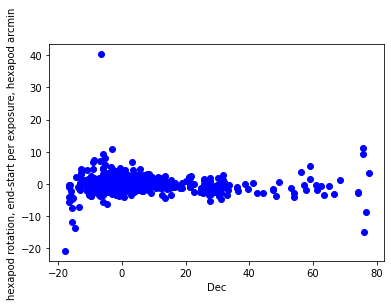

In [203]:
plt.plot(cprevvecd['mountdec'],cprevvecd['rotdelta'],'bo')
plt.ylabel('hexapod rotation, end-start per exposure, hexapod arcmin')
plt.xlabel('Dec')

Text(0.5, 0, 'Dec')

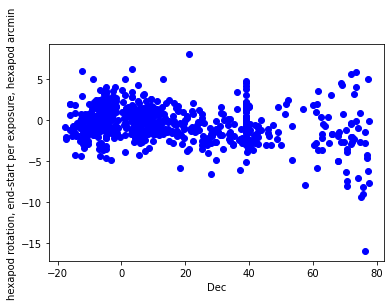

In [204]:
plt.plot(cnewvecd['mountdec'],cnewvecd['rotdelta'],'bo')
plt.ylabel('hexapod rotation, end-start per exposure, hexapod arcmin')
plt.xlabel('Dec')

(-15.0, 15.0)

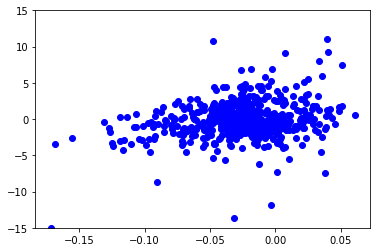

In [206]:
plt.plot(cprevvecd['ramean'],cprevvecd['rotdelta'],'bo')
plt.ylim(-15,15)

(-15.0, 15.0)

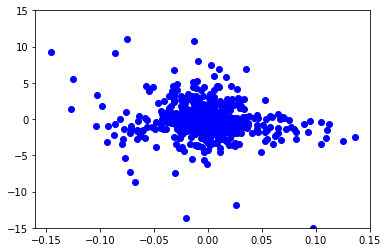

In [208]:
plt.plot(cprevvecd['decmean'],cprevvecd['rotdelta'],'bo')
plt.ylim(-15,15)

---

Detour to test boxcar filtering so we can smooth the rotation measurements

In [43]:
newgdict['153306'].keys()

dict_keys(['combined_x', 'combined_y', 'seeing', 'nstars', 'rotation', 'GUIDE0_0', 'GUIDE2_0', 'GUIDE2_1', 'GUIDE3_0', 'GUIDE3_1', 'GUIDE5_0', 'GUIDE5_1', 'GUIDE7_0', 'GUIDE8_0', 'expid', 'pixel_scale', 'pixel_scale_x', 'pixel_scale_y', 'tcs_correction_ra', 'tcs_correction_dec', 'guiding', 'send_guide_corrections', 'duration', 'frames', 'meanx', 'meany', 'meanx2', 'meany2', 'meanxy', 'maxx', 'maxy', 'airmass', 'skyra', 'mountaz', 'mountel', 'mountha', 'mountdec', 'pmirtemp', 'tairtemp', 'windspeed', 'winddir', 'dateobs'])

In [44]:
newgdict['153306']['rotation']

array([ 3.47857,  3.39129,  2.44343,  5.04748,  2.03792,  5.25522,
       -0.10019, -0.6176 , -3.10201, -0.27593,  4.20287,  0.21221,
        4.05618, -0.85953,  0.58408, -1.27805, -4.16784, -1.11581,
       -3.07487, -0.98722, -3.02158, -2.69159, -0.06902, -2.21603,
       -1.52598, -3.75524, -3.36992, -2.0441 , -0.46497, -5.24088,
        0.76977, -2.34323, -0.78803, -2.68447, -1.32313,  4.68363,
        2.7642 ,  4.12565,  1.48014, -0.20905, -0.23134, -1.10407,
       -1.35022,  0.43549, -3.53524, -2.19851, -1.10781, -3.85159,
       -4.42672, -3.47848, -4.15998, -3.00865,  0.36701, -2.28674,
        0.09744, -2.74889,  0.81658, -4.61836, -2.01531, -2.11433,
        1.27708, -2.20284,  0.68093,  1.60228, -0.59533, -4.5224 ,
       -1.03653, -3.03555, -2.23705, -3.04353,  2.94946, -1.35863,
       -2.0985 , -3.25746, -4.80864,  1.0098 , -2.40968, -2.3336 ,
       -3.97375, -1.93515, -2.42306, -4.12348, -3.22608, -3.38501,
       -6.95032, -6.36088, -0.53323, -2.58625, -2.38296, -1.41

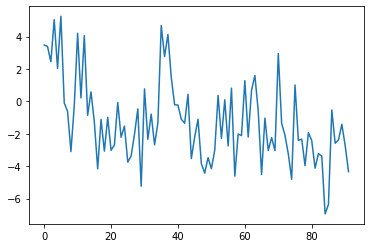

In [45]:
plt.plot(newgdict['153306']['rotation'])

In [47]:
import scipy.ndimage

In [49]:
filtrot=scipy.ndimage.median_filter(newgdict['153306']['rotation'],size=5,mode='reflect')

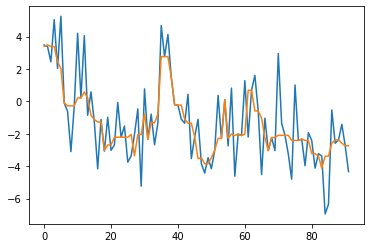

In [52]:
plt.plot(newgdict['153306']['rotation'])
plt.plot(filtrot)

end detour

---

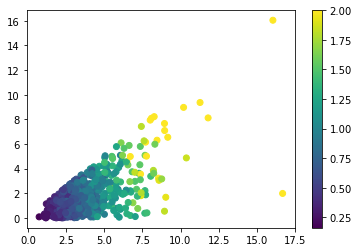

In [87]:
plt.scatter(cnewvecd['rotrange'],np.abs(cnewvecd['rotdelta']),c=cnewvecd['rotstd'],vmax=2)
plt.colorbar()

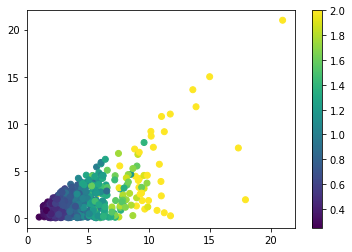

In [165]:
plt.scatter(cprevvecd['rotrange'],np.abs(cprevvecd['rotdelta']),c=cprevvecd['rotstd'],vmax=2)
plt.colorbar()

In [167]:
cnewbigrot,=np.where(np.abs(cnewvecd['rotdelta']) > 7)
cprevbigrot,=np.where(np.abs(cprevvecd['rotdelta']) > 7)

In [202]:
print(len(cnewbigrot))
print(len(cprevbigrot))
print(len(cnewvecd['rotdelta']))
print(len(cprevvecd['rotdelta']))

10
14
721
564


Look at how reliable the delta measurement is. Get some from near the limit and look at the measurements

In [93]:
icheck,=np.where((np.abs(cnewvecd['rotrange']) > 6) & (np.abs(cnewvecd['rotrange']) < 7))

In [94]:
len(icheck)

28

In [95]:
cnewvecd['seqid'][icheck]

array([154935, 157268, 157279, 155704, 157146, 153438, 153426, 158492,
       154161, 154149, 162352, 162349, 159435, 159447, 160032, 153614,
       153612, 153616, 154657, 160185, 153715, 153720, 154534, 162478,
       153843, 156628, 156632, 156631])

6.09344
-6.09344
154935


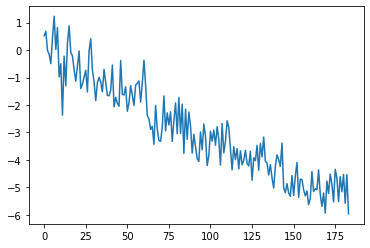

In [117]:
i=0
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.702960000000001
-2.2024
157268


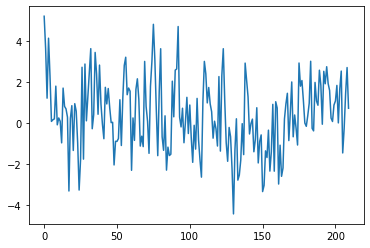

In [118]:
i=1
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.0579
-2.92134
157279


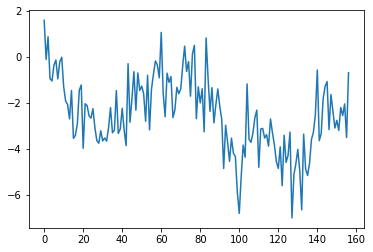

In [119]:
i=2
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.10693
-1.9948700000000001
155704


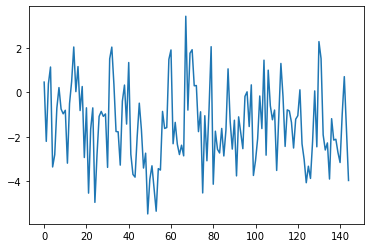

In [120]:
i=3
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.4566799999999995
-2.0926799999999997
157146


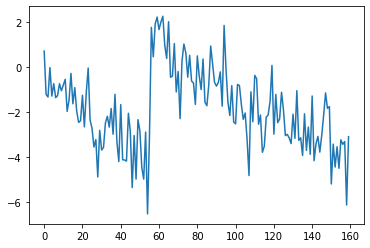

In [121]:
i=4
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.87255
-1.2307900000000003
153438


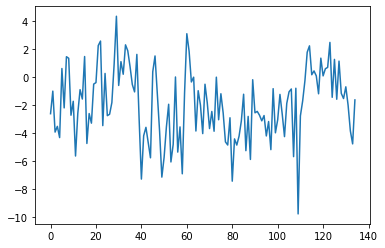

In [122]:
i=5
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.54137
4.30263
153426


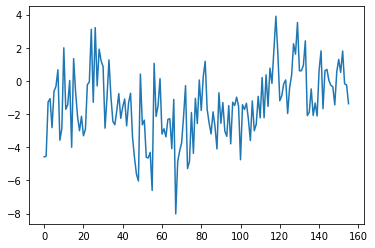

In [123]:
i=6
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.20246
1.91683
158492


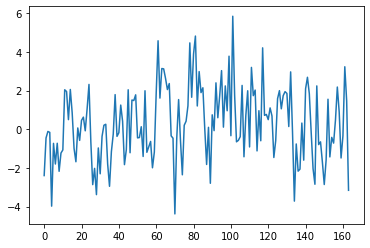

In [124]:
i=7
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.1485
-4.64023
154161


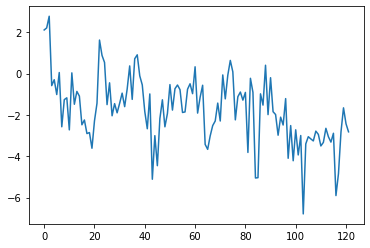

In [125]:
i=8
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.5588
1.25449
154149


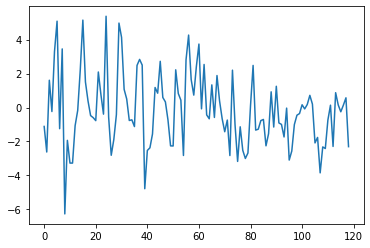

In [126]:
i=9
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.4799999999999995
-4.58247
162352


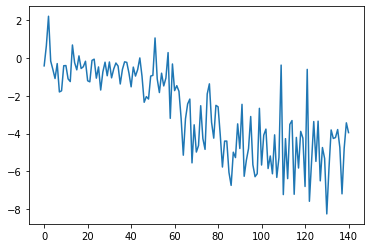

In [127]:
i=10
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.70341
0.1965799999999991
162349


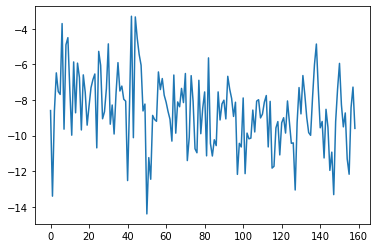

In [128]:
i=11
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.05146
-0.6972700000000001
159435


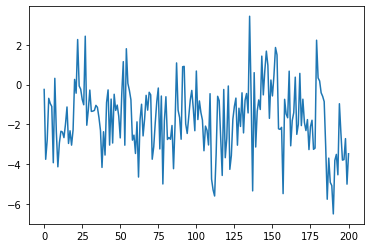

In [129]:
i=12
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.045640000000001
-4.35425
159447


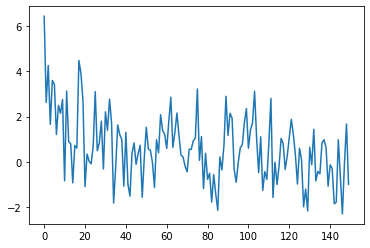

In [130]:
i=13
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.817270000000001
-3.7450600000000005
160032


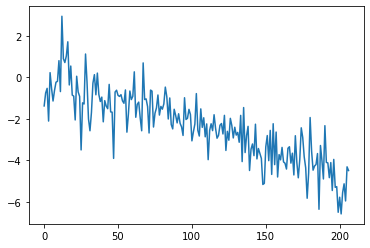

In [131]:
i=14
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.44434
4.5411
153614


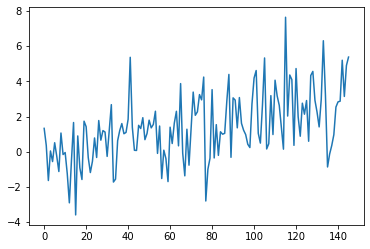

In [132]:
i=15
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.69788
4.98431
153612


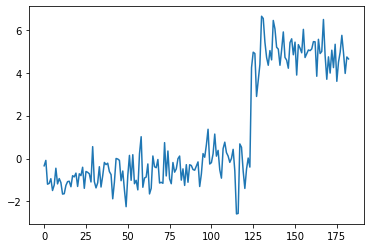

In [133]:
i=16
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.62125
5.88329
153616


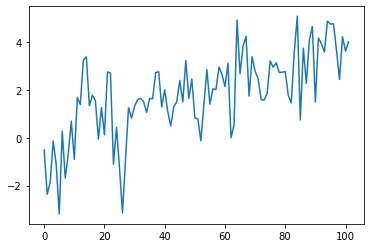

In [134]:
i=17
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.04845
5.08342
154657


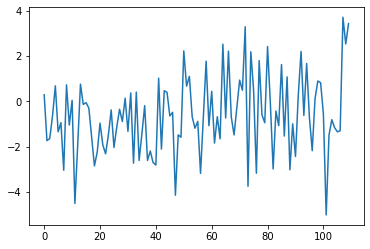

In [135]:
i=18
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.3859
0.7984699999999998
160185


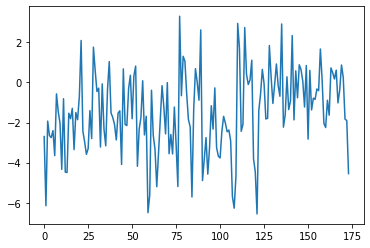

In [136]:
i=19
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.9999
3.70179
153715


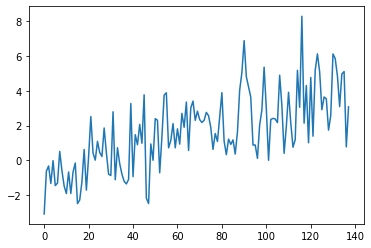

In [138]:
i=20
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.47194
0.34326999999999996
153720


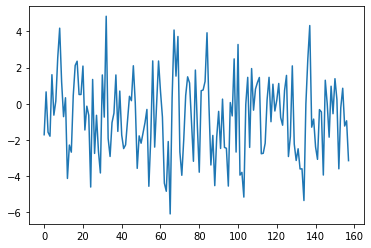

In [139]:
i=21
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.7413
2.093
154534


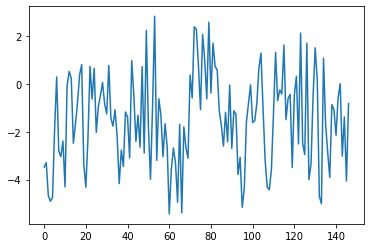

In [140]:
i=22
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.42768
2.2570099999999997
162478


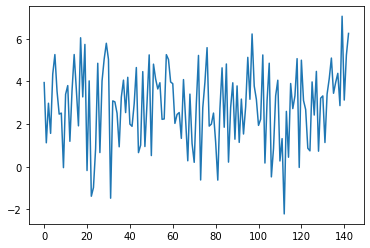

In [141]:
i=23
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.1887
-5.08101
153843


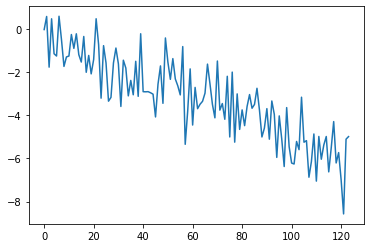

In [142]:
i=24
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.669510000000001
-2.9441100000000002
156628


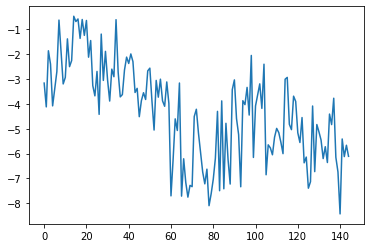

In [143]:
i=25
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.28924
5.649900000000001
156632


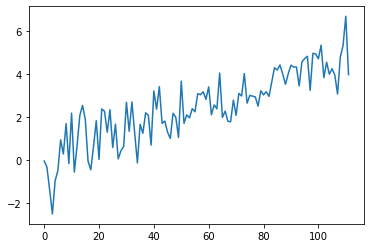

In [144]:
i=26
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

6.3003
1.98338
156631


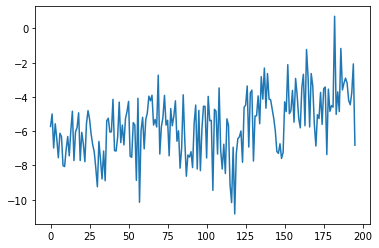

In [145]:
i=27
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

Text(0.5, 1.0, 'end - start rotation correction per exposure, hexapod arcsec')

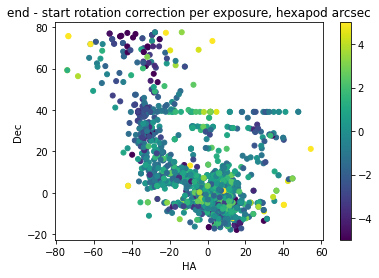

In [152]:
plt.scatter(cprevvecd['mountha'],cprevvecd['mountdec'],c=cprevvecd['rotdelta'], s=25,vmin=-5,vmax=5)
plt.scatter(cnewvecd['mountha'],cnewvecd['mountdec'],c=cnewvecd['rotdelta'], s=25,vmin=-5,vmax=5)
plt.colorbar()
plt.ylabel('Dec')
plt.xlabel('HA')
plt.title('end - start rotation correction per exposure, hexapod arcsec')

Text(0.5, 1.0, 'end - start rotation correction per exposure, hexapod arcsec')

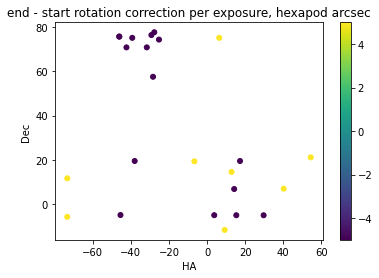

In [169]:
plt.scatter(cnewvecd['mountha'][cnewbigrot],cnewvecd['mountdec'][cnewbigrot],c=cnewvecd['rotdelta'][cnewbigrot], s=25,vmin=-5,vmax=5)
plt.scatter(cprevvecd['mountha'][cprevbigrot],cnewvecd['mountdec'][cprevbigrot],c=cprevvecd['rotdelta'][cprevbigrot], s=25,vmin=-5,vmax=5)
plt.colorbar()
plt.ylabel('Dec')
plt.xlabel('HA')
plt.title('end - start rotation correction per exposure, hexapod arcsec')

Look at what is going on with the rotation jumps

6.69788
4.98431
153612


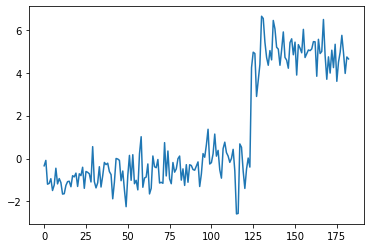

In [157]:
i=16
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])

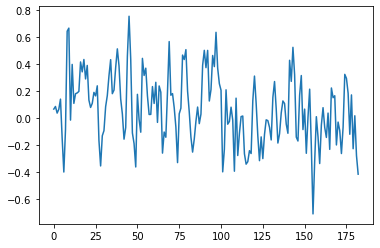

In [154]:
plt.plot(newgdict['153612']['combined_x'])


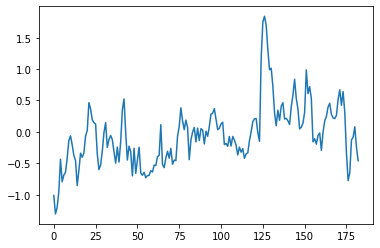

In [155]:
plt.plot(newgdict['153612']['combined_y'])

6.4566799999999995
-2.0926799999999997
157146


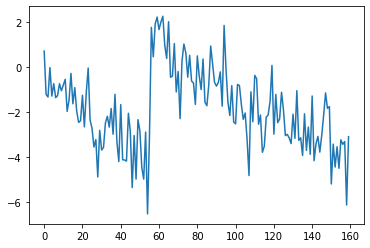

In [161]:
i=4
plt.plot(newgdict[str(cnewvecd['seqid'][icheck[i]])]['rotation'])
print(cnewvecd['rotrange'][icheck[i]])
print(cnewvecd['rotdelta'][icheck[i]])
print(cnewvecd['seqid'][icheck[i]])


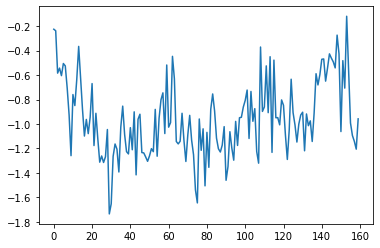

In [162]:
plt.plot(newgdict['157146']['combined_x'])


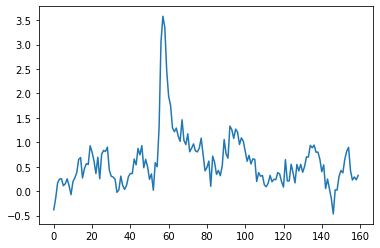

In [163]:
plt.plot(newgdict['157146']['combined_y'])


It looks like the rotation jumps correspond to a jump in the y correction

Now look at the rotation measurments for all the sequences with end-start > 7. There are 10 in the set of sequences after the Nov 22 guiding problem, and 14 in the set from before

16.06819
-16.041140000000002
157281


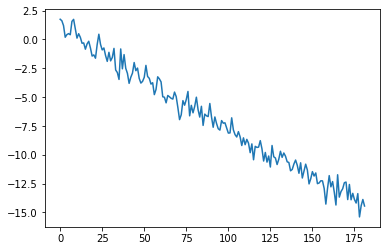

In [170]:
i=0
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

11.281699999999999
-9.3667
157148


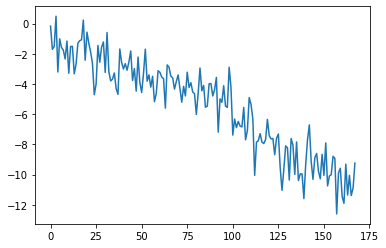

In [171]:
i=1
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

8.955710000000002
-7.089559999999999
153440


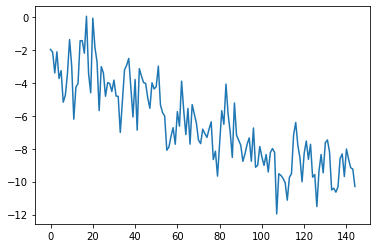

In [172]:
i=2
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

8.00691
-7.93651
158198


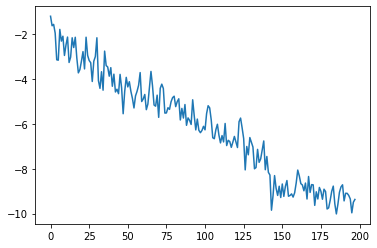

In [173]:
i=3
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

8.087489999999999
-8.087489999999999
161989


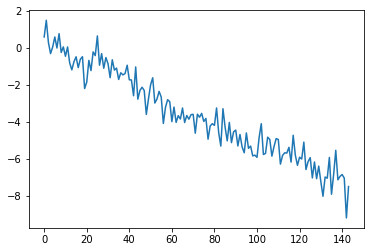

In [174]:
i=4
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

10.19966
-8.96968
162357


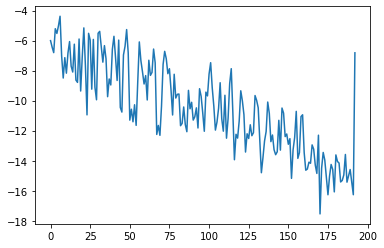

In [175]:
i=5
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

8.26853
-8.218960000000001
162356


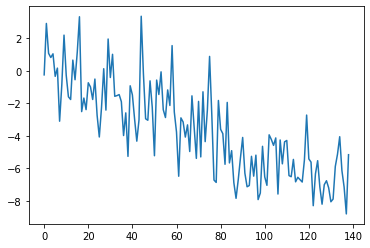

In [176]:
i=6
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

11.811150000000001
8.11702
153310


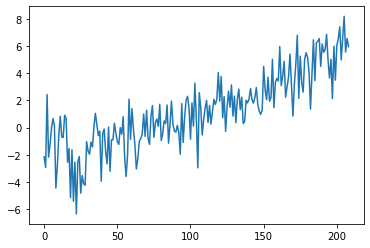

In [177]:
i=7
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

8.944759999999999
-7.662640000000001
153314


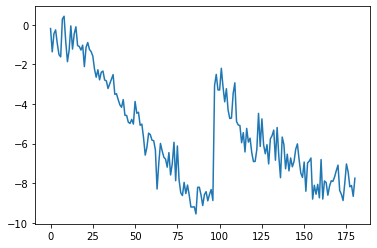

In [178]:
i=8
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

Another rotation jump, look at x and y

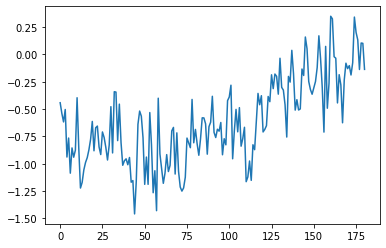

In [179]:
plt.plot(newgdict['153314']['combined_x'])

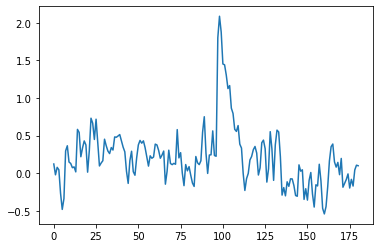

In [180]:
plt.plot(newgdict['153314']['combined_y'])

7.42473
-7.42473
153611


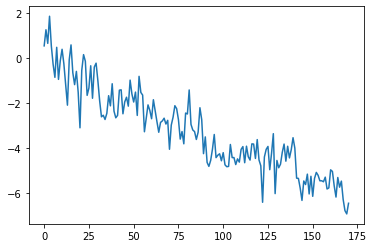

In [181]:
i=9
plt.plot(newgdict[str(cnewvecd['seqid'][cnewbigrot[i]])]['rotation'])
print(cnewvecd['rotrange'][cnewbigrot[i]])
print(cnewvecd['rotdelta'][cnewbigrot[i]])
print(cnewvecd['seqid'][cnewbigrot[i]])

10.191429999999999
-8.685329999999999
148805


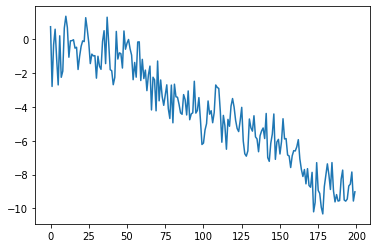

In [184]:
i=0
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

11.27148
9.1586
149071


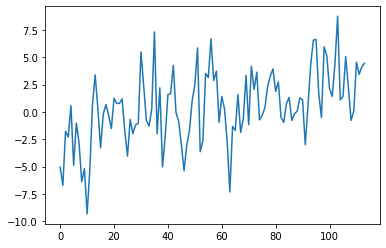

In [185]:
i=1
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

13.61545
-13.61545
149068


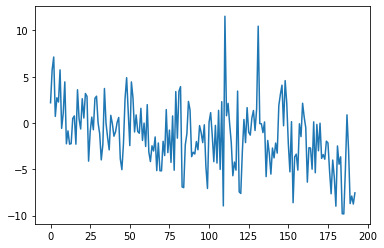

In [186]:
i=2
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

13.87867
-11.80489
142434


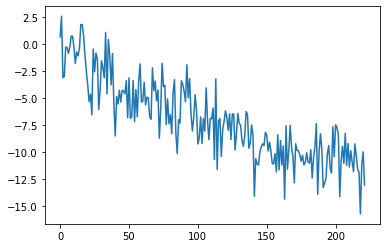

In [187]:
i=3
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

17.35469
-7.42938
142436


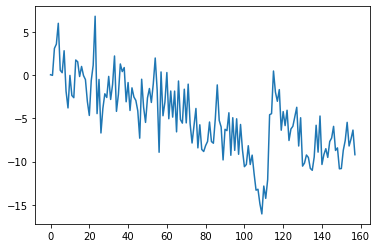

In [188]:
i=4
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

Another rotation jump, look at x and y

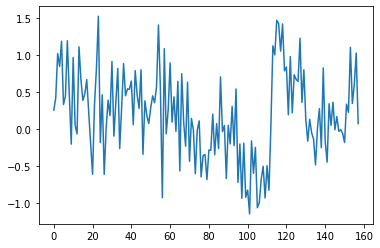

In [190]:
plt.plot(prevgdict['142436']['combined_x'])

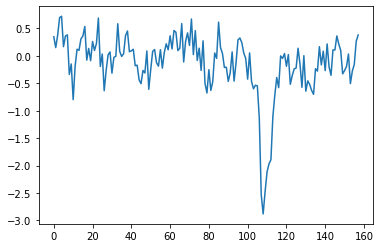

In [191]:
plt.plot(prevgdict['142436']['combined_y'])

8.83389
-7.31433
142438


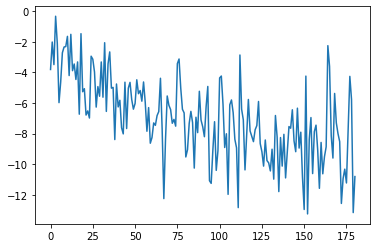

In [192]:
i=5
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

8.83389
-7.31433
142438


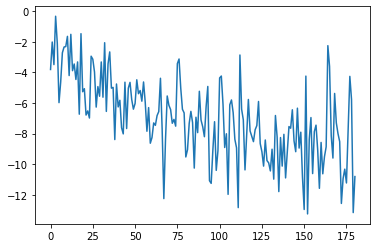

In [193]:
i=5
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

20.99147
-20.99147
142437


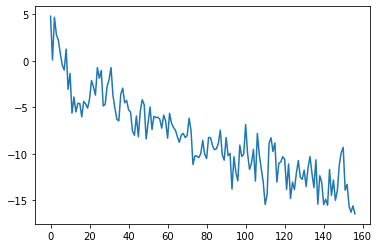

In [194]:
i=6
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

9.60839
8.00762
142566


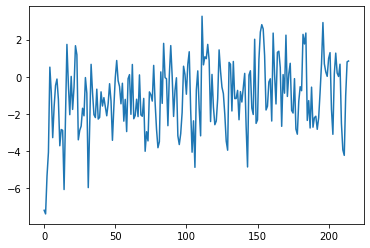

In [195]:
i=7
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

10.16961
9.18884
142825


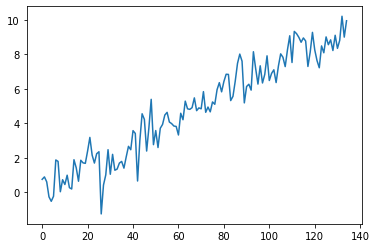

In [196]:
i=8
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

11.759989999999998
11.03057
142826


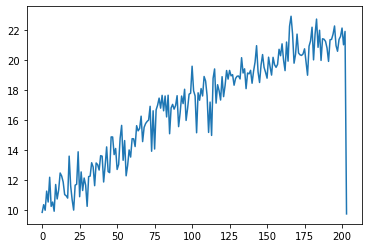

In [197]:
i=9
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

nan
40.45548
142811


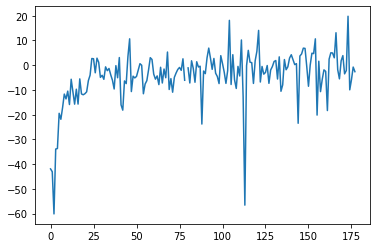

In [198]:
i=10
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

11.04297
10.77468
145336


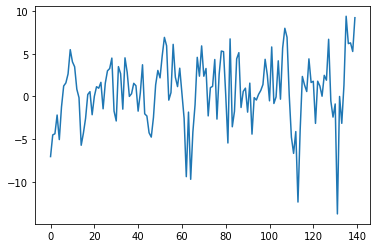

In [199]:
i=11
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

10.370999999999999
7.5040000000000004
147641


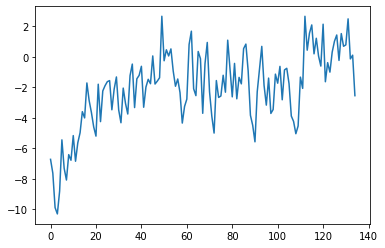

In [200]:
i=12
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])

14.9979
-14.9979
148938


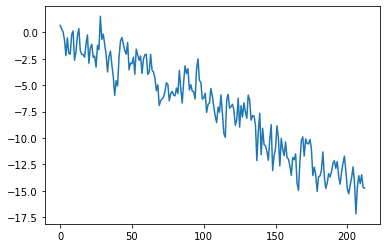

In [201]:
i=13
plt.plot(prevgdict[str(cprevvecd['seqid'][cprevbigrot[i]])]['rotation'])
print(cprevvecd['rotrange'][cprevbigrot[i]])
print(cprevvecd['rotdelta'][cprevbigrot[i]])
print(cprevvecd['seqid'][cprevbigrot[i]])